# EDA and Preparation for Machine Learning 

Given the output from the Data_Preprocessing.ipynb notebook, this Jupyter notebook will be focused on exploring the data and removing any anomalies that may be found a long the way. The end of this notebook will also review what features should be selected for the Machine Learning model - but finally determined in the Notebook named "ML.ipynb".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data output developed from the Data_Preprocesing notebook

df = pd.read_excel("Output_Data\main_dataset.xlsx")
df.head()

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl
0,ACT - South West,801111140,45.7,5158,66401,190,317,109,53,31,0
1,Acton - Upper Burnie,604011075,145.0,3206,46033,1628,1184,135,438,556,5
2,Adelaide,401011001,812.0,16285,54807,8147,5972,5237,904,3978,7
3,Adelaide Hills,401021003,17.0,6914,60508,2670,3558,944,1132,227,0
4,Airlie - Whitsundays,312031359,33.0,13375,50559,5701,6653,1359,1061,1788,22


In [3]:
df.shape

(988, 11)

In [4]:
df.isnull().sum()

SA2_NAME                       0
SA2_MAINCODE                   0
Number of available beds       0
Population                     0
Median_Annual_Income           0
No_of_Dwellings                0
No_of_people_earning_income    0
No_of_tertiary_educated        0
Ppl_on_Mortgage                0
Number_of_renters              0
No_of_indigenous_ppl           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SA2_NAME                     988 non-null    object 
 1   SA2_MAINCODE                 988 non-null    int64  
 2   Number of available beds     988 non-null    float64
 3   Population                   988 non-null    int64  
 4   Median_Annual_Income         988 non-null    int64  
 5   No_of_Dwellings              988 non-null    int64  
 6   No_of_people_earning_income  988 non-null    int64  
 7   No_of_tertiary_educated      988 non-null    int64  
 8   Ppl_on_Mortgage              988 non-null    int64  
 9   Number_of_renters            988 non-null    int64  
 10  No_of_indigenous_ppl         988 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 85.0+ KB


In [6]:
df.describe()

,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl
count,9.880000e+02,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,2.857424e+08,212.265283,9467.178138,55910.448381,4329.303644,4270.668016,1422.783401,1018.480769,1113.692308,16.521255
std,1.731594e+08,263.619262,6719.555085,15066.160496,2705.873716,2930.537082,1635.233947,779.896668,981.980358,60.787241
min,1.010210e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.190115e+08,34.000000,4641.500000,48115.500000,2335.750000,2080.750000,421.750000,462.000000,446.750000,0.000000
50%,2.170365e+08,96.250000,7719.000000,54055.000000,3727.000000,3429.000000,846.500000,817.500000,806.500000,5.000000
75%,4.020310e+08,299.625000,13327.000000,61734.500000,5923.000000,5982.000000,1805.000000,1427.000000,1540.250000,13.000000
max,8.011111e+08,1543.800000,33811.000000,289000.000000,20156.000000,17438.000000,11753.000000,4695.000000,8371.000000,1392.000000


In [7]:
df.nunique()

SA2_NAME                       988
SA2_MAINCODE                   988
Number of available beds       369
Population                     921
Median_Annual_Income           966
No_of_Dwellings                926
No_of_people_earning_income    910
No_of_tertiary_educated        805
Ppl_on_Mortgage                760
Number_of_renters              776
No_of_indigenous_ppl            90
dtype: int64

## How do the features differ in distribution

### Comments

Most of the distributions appear to be positively skewed and a similar shape (apart from the indigenous population which is to be expected).

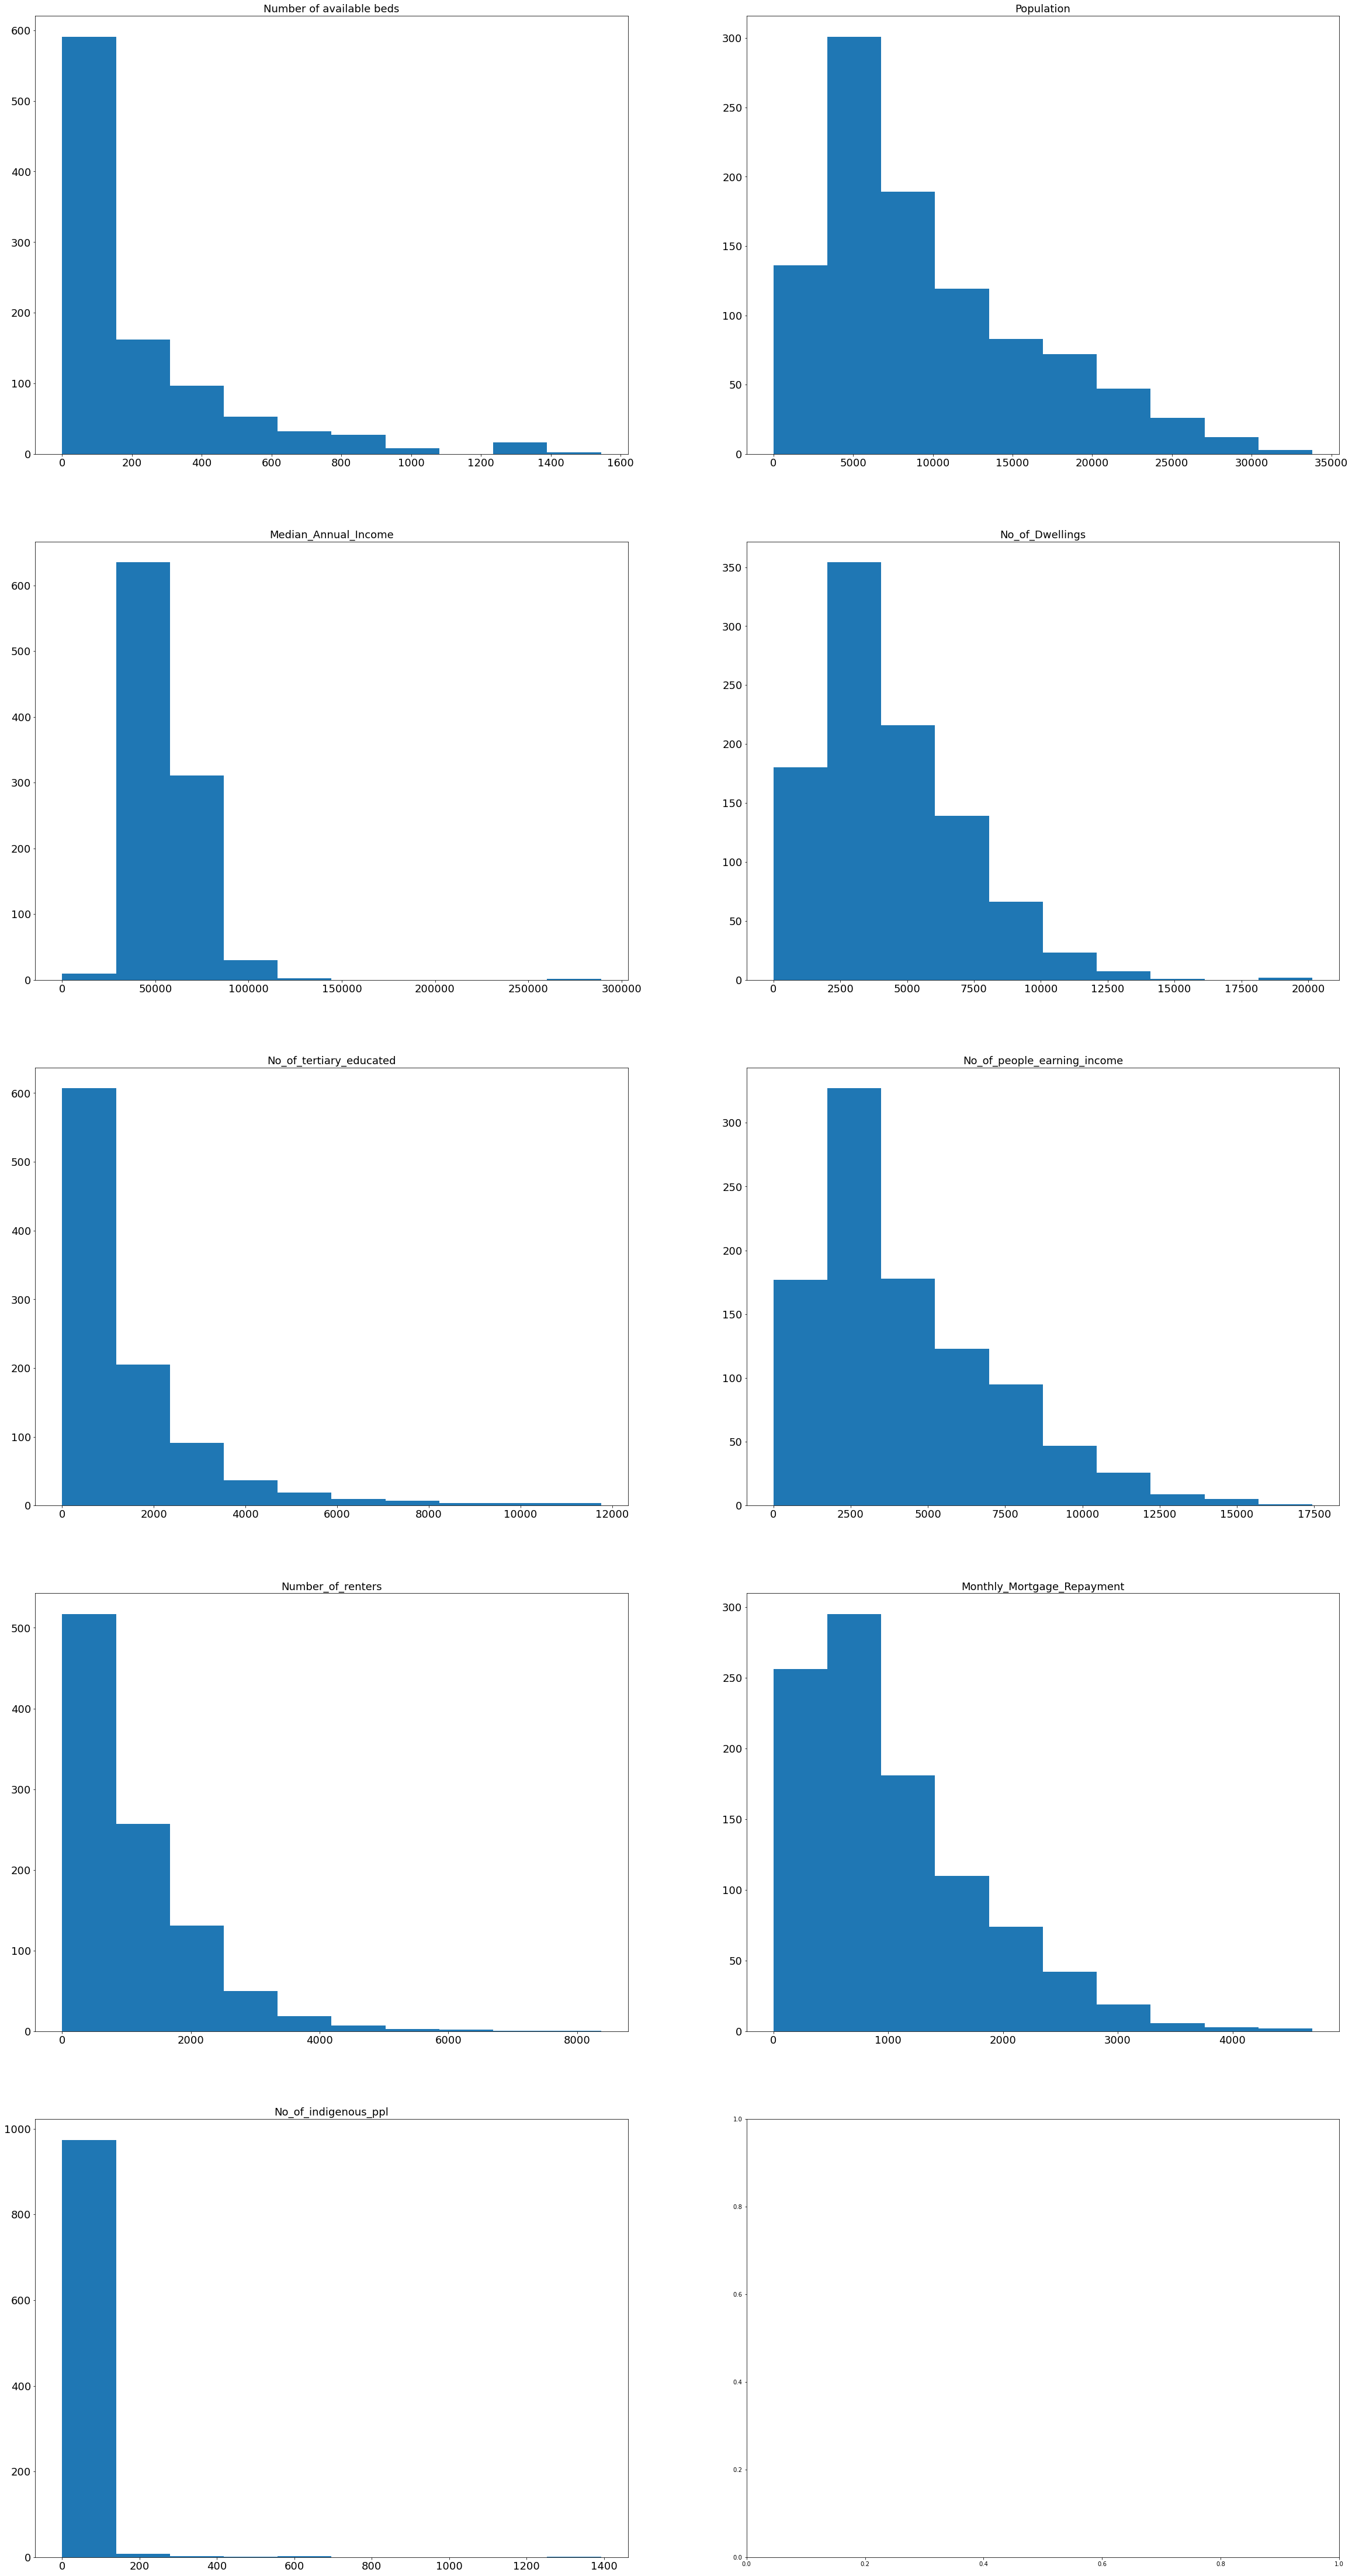

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(40,80))


# Create a distribution plot for Number of available beds
df['Number of available beds'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[0,0])

# Create a distribution plot for population
df['Population'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[0,1])

# Create a distribution plot for Median Annual Income
df['Median_Annual_Income'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[1,0])

# Create a distribution plot for dwellings
df['No_of_Dwellings'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[1,1])

# Create a distribution plot for No of people earning income
df['No_of_people_earning_income'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[2,1])

# Create a distribution plot for No of tertiary educated
df['No_of_tertiary_educated'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[2,0])

# Create a distribution plot for Monthly Mortgage Repayments
df['Ppl_on_Mortgage'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[3,1])

# Create a distribution plot for Number of renters
df['Number_of_renters'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[3,0])

# Create a distribution plot for No of indigenous ppl
df['No_of_indigenous_ppl'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[4,0])

title_arr = ['Number of available beds',
             'Population',
             'Median_Annual_Income',
             'No_of_Dwellings',
             'No_of_people_earning_income',
            'No_of_tertiary_educated',
             'Monthly_Mortgage_Repayment',
             'Number_of_renters',
             'No_of_indigenous_ppl']

ax[0, 0].set_title("Number of available beds", fontsize=18)
ax[0, 1].set_title("Population", fontsize=18)
ax[1, 0].set_title("Median_Annual_Income", fontsize=18)
ax[1, 1].set_title("No_of_Dwellings", fontsize=18)
ax[2, 1].set_title("No_of_people_earning_income", fontsize=18)
ax[2, 0].set_title("No_of_tertiary_educated", fontsize=18)
ax[3, 1].set_title("Monthly_Mortgage_Repayment", fontsize=18)
ax[3, 0].set_title("Number_of_renters", fontsize=18)
ax[4, 0].set_title("No_of_indigenous_ppl", fontsize=18)

plt.rcParams['figure.figsize'] = [20, 100]

## Exploring the features via correlation and jointplots

The number of available hospital beds will need to have some correlation with the features used in the dataset. This section aims to determine which features could be used.

Index(['Number of available beds', 'No_of_tertiary_educated',
       'Number_of_renters', 'No_of_people_earning_income',
       'Median_Annual_Income', 'Population', 'No_of_Dwellings',
       'Ppl_on_Mortgage', 'No_of_indigenous_ppl'],
      dtype='object')


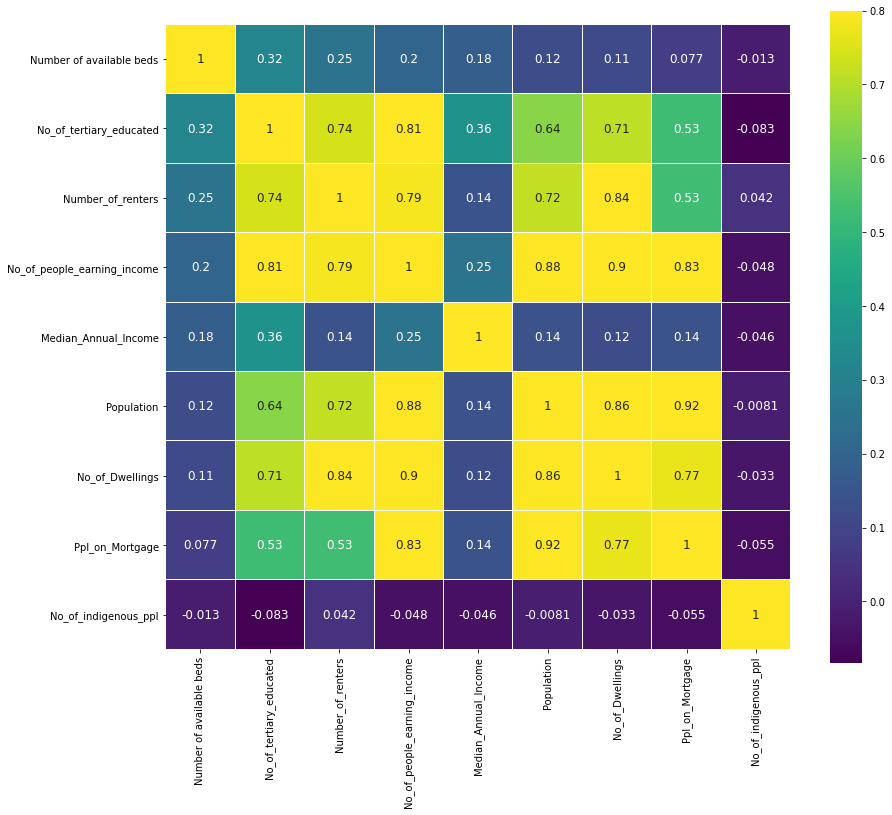

In [9]:
df_num = df.select_dtypes(include=['float64', 'int64'])

correlation = df_num.corr()  
k= 9
cols = correlation.nlargest(k,'Number of available beds')['Number of available beds'].index
print(cols)
cm = np.corrcoef(df_num[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

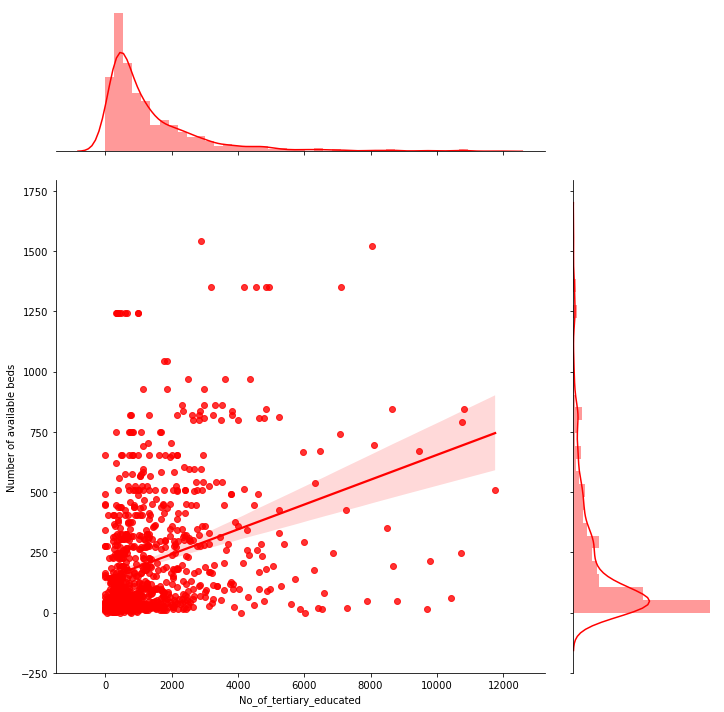

In [10]:
sns.jointplot(x="No_of_tertiary_educated", y="Number of available beds", data=df_num, height=10, ratio=3, color="r", kind="reg")
plt.show()

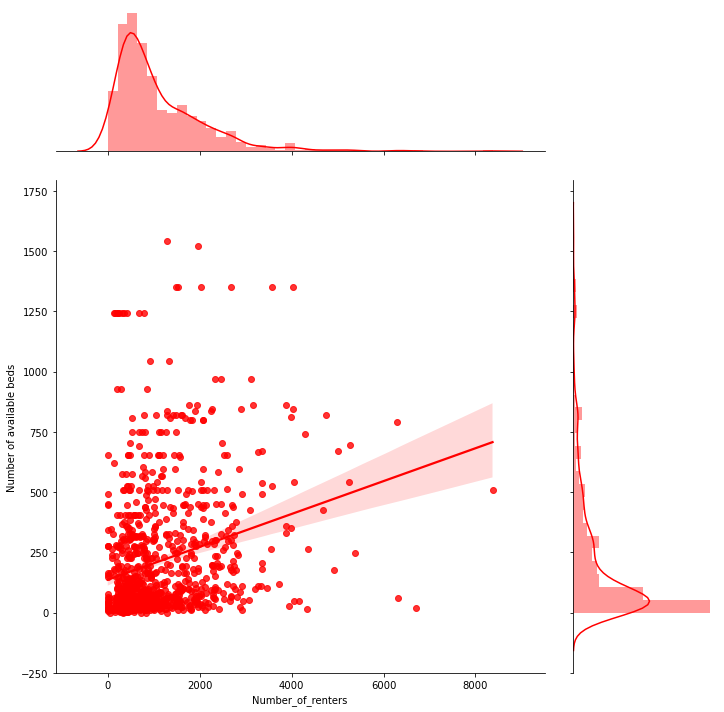

In [11]:
sns.jointplot(x="Number_of_renters", y="Number of available beds", data=df_num, height=10, ratio=3, color="r", kind="reg")
plt.show()

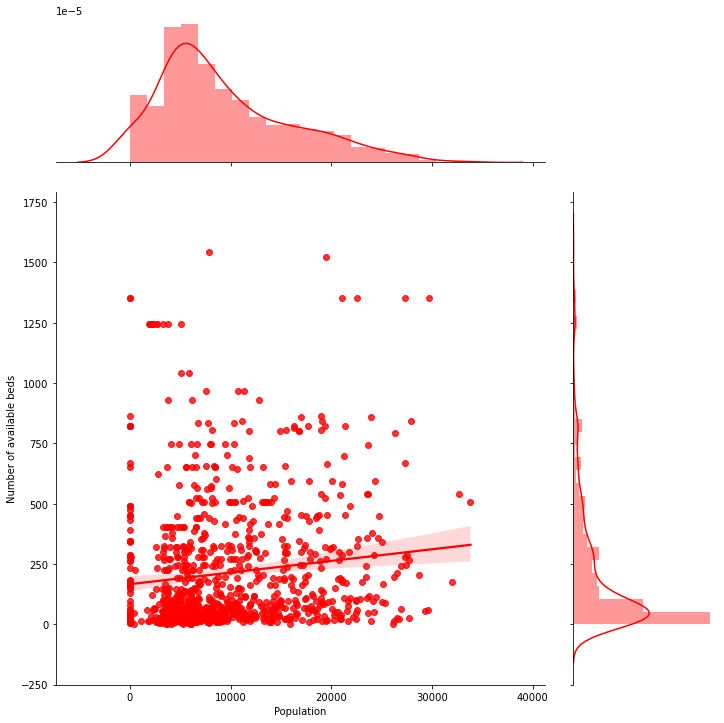

In [12]:
sns.jointplot(x="Population", y="Number of available beds", data=df_num, height=10, ratio=3, color="r", kind="reg")
plt.show()

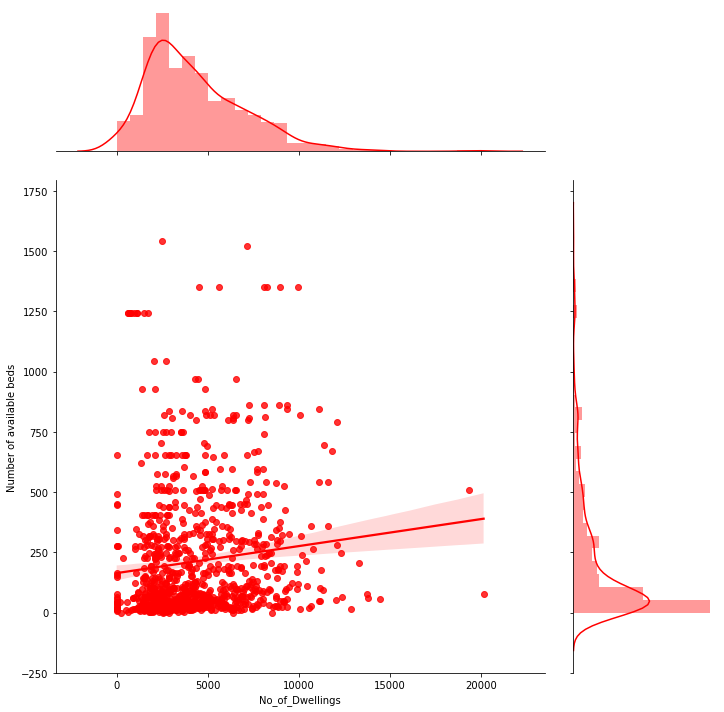

In [13]:
sns.jointplot(x="No_of_Dwellings", y="Number of available beds", data=df_num, height=10, ratio=3, color="r", kind="reg")
plt.show()

In [14]:
# Anomaly Checks


check_1 = df[df["Number of available beds"] == 1243]
check_1

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl
6,Alawa,701021010,1243.0,2286,62609,788,1036,422,251,220,20
111,Brinkin - Nakara,701021013,1243.0,3839,62981,1136,1886,1000,305,354,16
200,Coconut Grove,701021016,1243.0,3323,63371,1475,1558,646,286,683,15
427,Jingili,701021018,1243.0,1894,70534,643,877,359,264,138,15
527,Lyons (NT),701021021,1243.0,5076,79889,1724,2582,984,134,795,18
574,Millner,701021023,1243.0,2737,63252,1112,1339,486,306,422,20
578,Moil,701021024,1243.0,2137,65169,730,978,323,241,206,16
859,Tiwi,701021027,1243.0,2735,74439,946,1166,604,283,305,22
890,Wagaman,701021028,1243.0,2345,59864,726,1038,348,242,239,21
909,Wanguri,701021029,1243.0,2002,70082,649,916,368,230,156,7


In [15]:
check_1_arr = ['Alawa', 'Brinkin - Nakara', 'Coconut Grove', 'Jingili', 'Lyons (NT)', 'Millner', 'Moil', 'Tiwi', 'Wagaman', 'Wanguri']

check_1_data_source = pd.read_csv("Data\SA2_Postcode_Map.csv")
check_1_data_source = check_1_data_source[check_1_data_source["SA2_NAME"].isin(check_1_arr)]
check_1_data_source

,LOCALITY_ID,LOCALITY_NAME,LOCALITY_TYPE,POSTCODE,STATE,SA2_MAINCODE,SA2_NAME
7662,NT3,ALAWA,GAZETTED LOCALITY,810,NT,701021010,Alawa
7881,NT41,BRINKIN,GAZETTED LOCALITY,810,NT,701021013,Brinkin - Nakara
7954,NT52,CASUARINA,GAZETTED LOCALITY,810,NT,701021013,Brinkin - Nakara
7998,NT60,COCONUT GROVE,GAZETTED LOCALITY,810,NT,701021016,Coconut Grove
7999,NT60,KULALUK,ALIAS LOCALITY,810,NT,701021016,Coconut Grove
8505,NT141,JINGILI,GAZETTED LOCALITY,810,NT,701021018,Jingili
8506,NT141,CAMERON PARK,ALIAS LOCALITY,810,NT,701021018,Jingili
8632,NT164,LEE POINT,GAZETTED LOCALITY,0,NT,701021021,Lyons (NT)
8633,NT164,LEE PT,ALIAS LOCALITY,0,NT,701021021,Lyons (NT)
8657,NT170,LYONS,GAZETTED LOCALITY,810,NT,701021021,Lyons (NT)


## Comments on anomaly 

In the situation above, we can see a high number of hospital beds spread across multiple SA2s. It is known to Australian's that these SA2s are low in population but large in area. There is an expectation that people living in these areas need to travel long distances to be admitted into hospital.

## 2nd Anomaly check

We will need to check if similar scenarios as the one above also exists. A high number of hospital beds within a very rural area may skew the model as they are outliers for what we're trying to determine.

In [16]:
check_2 = df[df["Number of available beds"] > 1243]
check_2

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl
375,Greystanes - Pemulwuy,125031482,1351.4,27290,64890,8946,11972,4174,3126,1494,5
564,Merrylands - Holroyd,125031485,1351.4,29739,52502,9981,11434,4541,2412,4025,11
634,Nedlands - Dalkeith - Crawley,503011035,1522.8,19446,104373,7147,7951,8045,1460,1958,4
667,Northmead,125041491,1351.4,21105,67670,8255,9854,7099,1927,3582,0
690,Parkville,206041124,1543.8,7898,58190,2479,3503,2874,282,1297,3
695,Pendle Hill - Girraween,125041588,1351.4,0,60158,4513,5367,3183,0,1524,0
861,Toongabbie - Constitution Hill,125041493,1351.4,22570,62389,8093,10000,4859,2611,2035,3
927,Wentworthville - Westmead,125041589,1351.4,0,61772,5629,6882,4951,0,2676,3


In [17]:
check_2_arr = ['Greystanes - Pemulwuy', 'Merrylands - Holroyd', 'Nedlands - Dalkeith - Crawley', 'Northmead', 'Parkville', 'Toongabbie - Constitution Hill']

check_2_data_source = pd.read_csv("Data\SA2_Postcode_Map.csv")
check_2_data_source = check_2_data_source[check_2_data_source["SA2_NAME"].isin(check_2_arr)]
check_2_data_source

,LOCALITY_ID,LOCALITY_NAME,LOCALITY_TYPE,POSTCODE,STATE,SA2_MAINCODE,SA2_NAME
1800,NSW1027,CONSTITUTION HILL,GAZETTED LOCALITY,2145,NSW,125041493,Toongabbie - Constitution Hill
3121,NSW1797,GREYSTANES,GAZETTED LOCALITY,2145,NSW,125031482,Greystanes - Pemulwuy
3352,NSW1943,HOLROYD,GAZETTED LOCALITY,2142,NSW,125031485,Merrylands - Holroyd
4423,NSW2610,MERRYLANDS,GAZETTED LOCALITY,2160,NSW,125031485,Merrylands - Holroyd
5229,NSW3051,NORTHMEAD,GAZETTED LOCALITY,2152,NSW,125041491,Northmead
5320,NSW3112,OLD TOONGABBIE,GAZETTED LOCALITY,2146,NSW,125041493,Toongabbie - Constitution Hill
5489,NSW3208,PEMULWUY,GAZETTED LOCALITY,2145,NSW,125031482,Greystanes - Pemulwuy
6162,NSW3632,SOUTH WENTWORTHVILLE,GAZETTED LOCALITY,2145,NSW,125031485,Merrylands - Holroyd
6163,NSW3632,S WENTWORTHVILLE,ALIAS LOCALITY,2145,NSW,125031485,Merrylands - Holroyd
6164,NSW3632,WENTWORTHVILLE SOUTH,ALIAS LOCALITY,2145,NSW,125031485,Merrylands - Holroyd


# Outliers to be removed

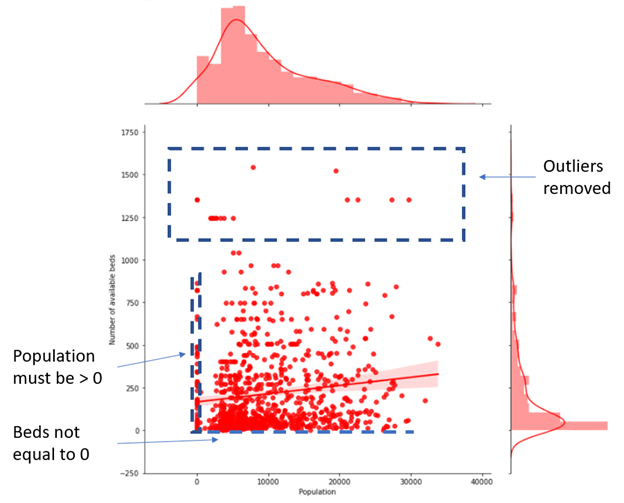

In [18]:
new_df = df

new_df = new_df[(new_df["Number of available beds"] < 1243)]
new_df = new_df[(new_df["Number of available beds"] != 0)]
new_df = new_df[(new_df["Population"] > 50)]

new_df.shape

(901, 11)

In [19]:
# Add aditional feature to dataset

area = pd.read_csv("Data\SA2_Area_KM.csv")
area.head()

,SA2_MAINCODE_2016,SA2_5DIGITCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM
0,101021007,11007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525
1,101021008,11008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825
2,101021009,11009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634
3,101021010,11010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034
4,101021011,11011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099


In [20]:
new_df = pd.merge(new_df, area, left_on="SA2_NAME",
                       right_on="SA2_NAME_2016", how="inner")

new_df.shape

(901, 23)

In [21]:
new_df.head()

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,...,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM
0,ACT - South West,801111140,45.7,5158,66401,190,317,109,53,31,...,ACT - South West,80111,Urriarra - Namadgi,801,Australian Capital Territory,8ACTE,Australian Capital Territory,8,Australian Capital Territory,416.6124
1,Acton - Upper Burnie,604011075,145.0,3206,46033,1628,1184,135,438,556,...,Acton - Upper Burnie,60401,Burnie - Ulverstone,604,West and North West,6RTAS,Rest of Tas.,6,Tasmania,2.1455
2,Adelaide,401011001,812.0,16285,54807,8147,5972,5237,904,3978,...,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824
3,Adelaide Hills,401021003,17.0,6914,60508,2670,3558,944,1132,227,...,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390
4,Airlie - Whitsundays,312031359,33.0,13375,50559,5701,6653,1359,1061,1788,...,Airlie - Whitsundays,31203,Whitsunday,312,Mackay - Isaac - Whitsunday,3RQLD,Rest of Qld,3,Queensland,304.0111


In [22]:
new_df.drop(["SA2_NAME_2016", "SA3_CODE_2016", "SA3_NAME_2016", "SA4_CODE_2016", "SA4_NAME_2016", "GCCSA_CODE_2016", "GCCSA_NAME_2016",
        "STATE_CODE_2016", "STATE_NAME_2016", "SA2_MAINCODE_2016", "SA2_5DIGITCODE_2016"], axis=1, inplace=True)
new_df.head()

,SA2_NAME,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl,AREA_ALBERS_SQKM
0,ACT - South West,801111140,45.7,5158,66401,190,317,109,53,31,0,416.6124
1,Acton - Upper Burnie,604011075,145.0,3206,46033,1628,1184,135,438,556,5,2.1455
2,Adelaide,401011001,812.0,16285,54807,8147,5972,5237,904,3978,7,10.4824
3,Adelaide Hills,401021003,17.0,6914,60508,2670,3558,944,1132,227,0,364.4390
4,Airlie - Whitsundays,312031359,33.0,13375,50559,5701,6653,1359,1061,1788,22,304.0111


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SA2_NAME                     901 non-null    object 
 1   SA2_MAINCODE                 901 non-null    int64  
 2   Number of available beds     901 non-null    float64
 3   Population                   901 non-null    int64  
 4   Median_Annual_Income         901 non-null    int64  
 5   No_of_Dwellings              901 non-null    int64  
 6   No_of_people_earning_income  901 non-null    int64  
 7   No_of_tertiary_educated      901 non-null    int64  
 8   Ppl_on_Mortgage              901 non-null    int64  
 9   Number_of_renters            901 non-null    int64  
 10  No_of_indigenous_ppl         901 non-null    int64  
 11  AREA_ALBERS_SQKM             901 non-null    float64
dtypes: float64(2), int64(9), object(1)
memory usage: 91.5+ KB


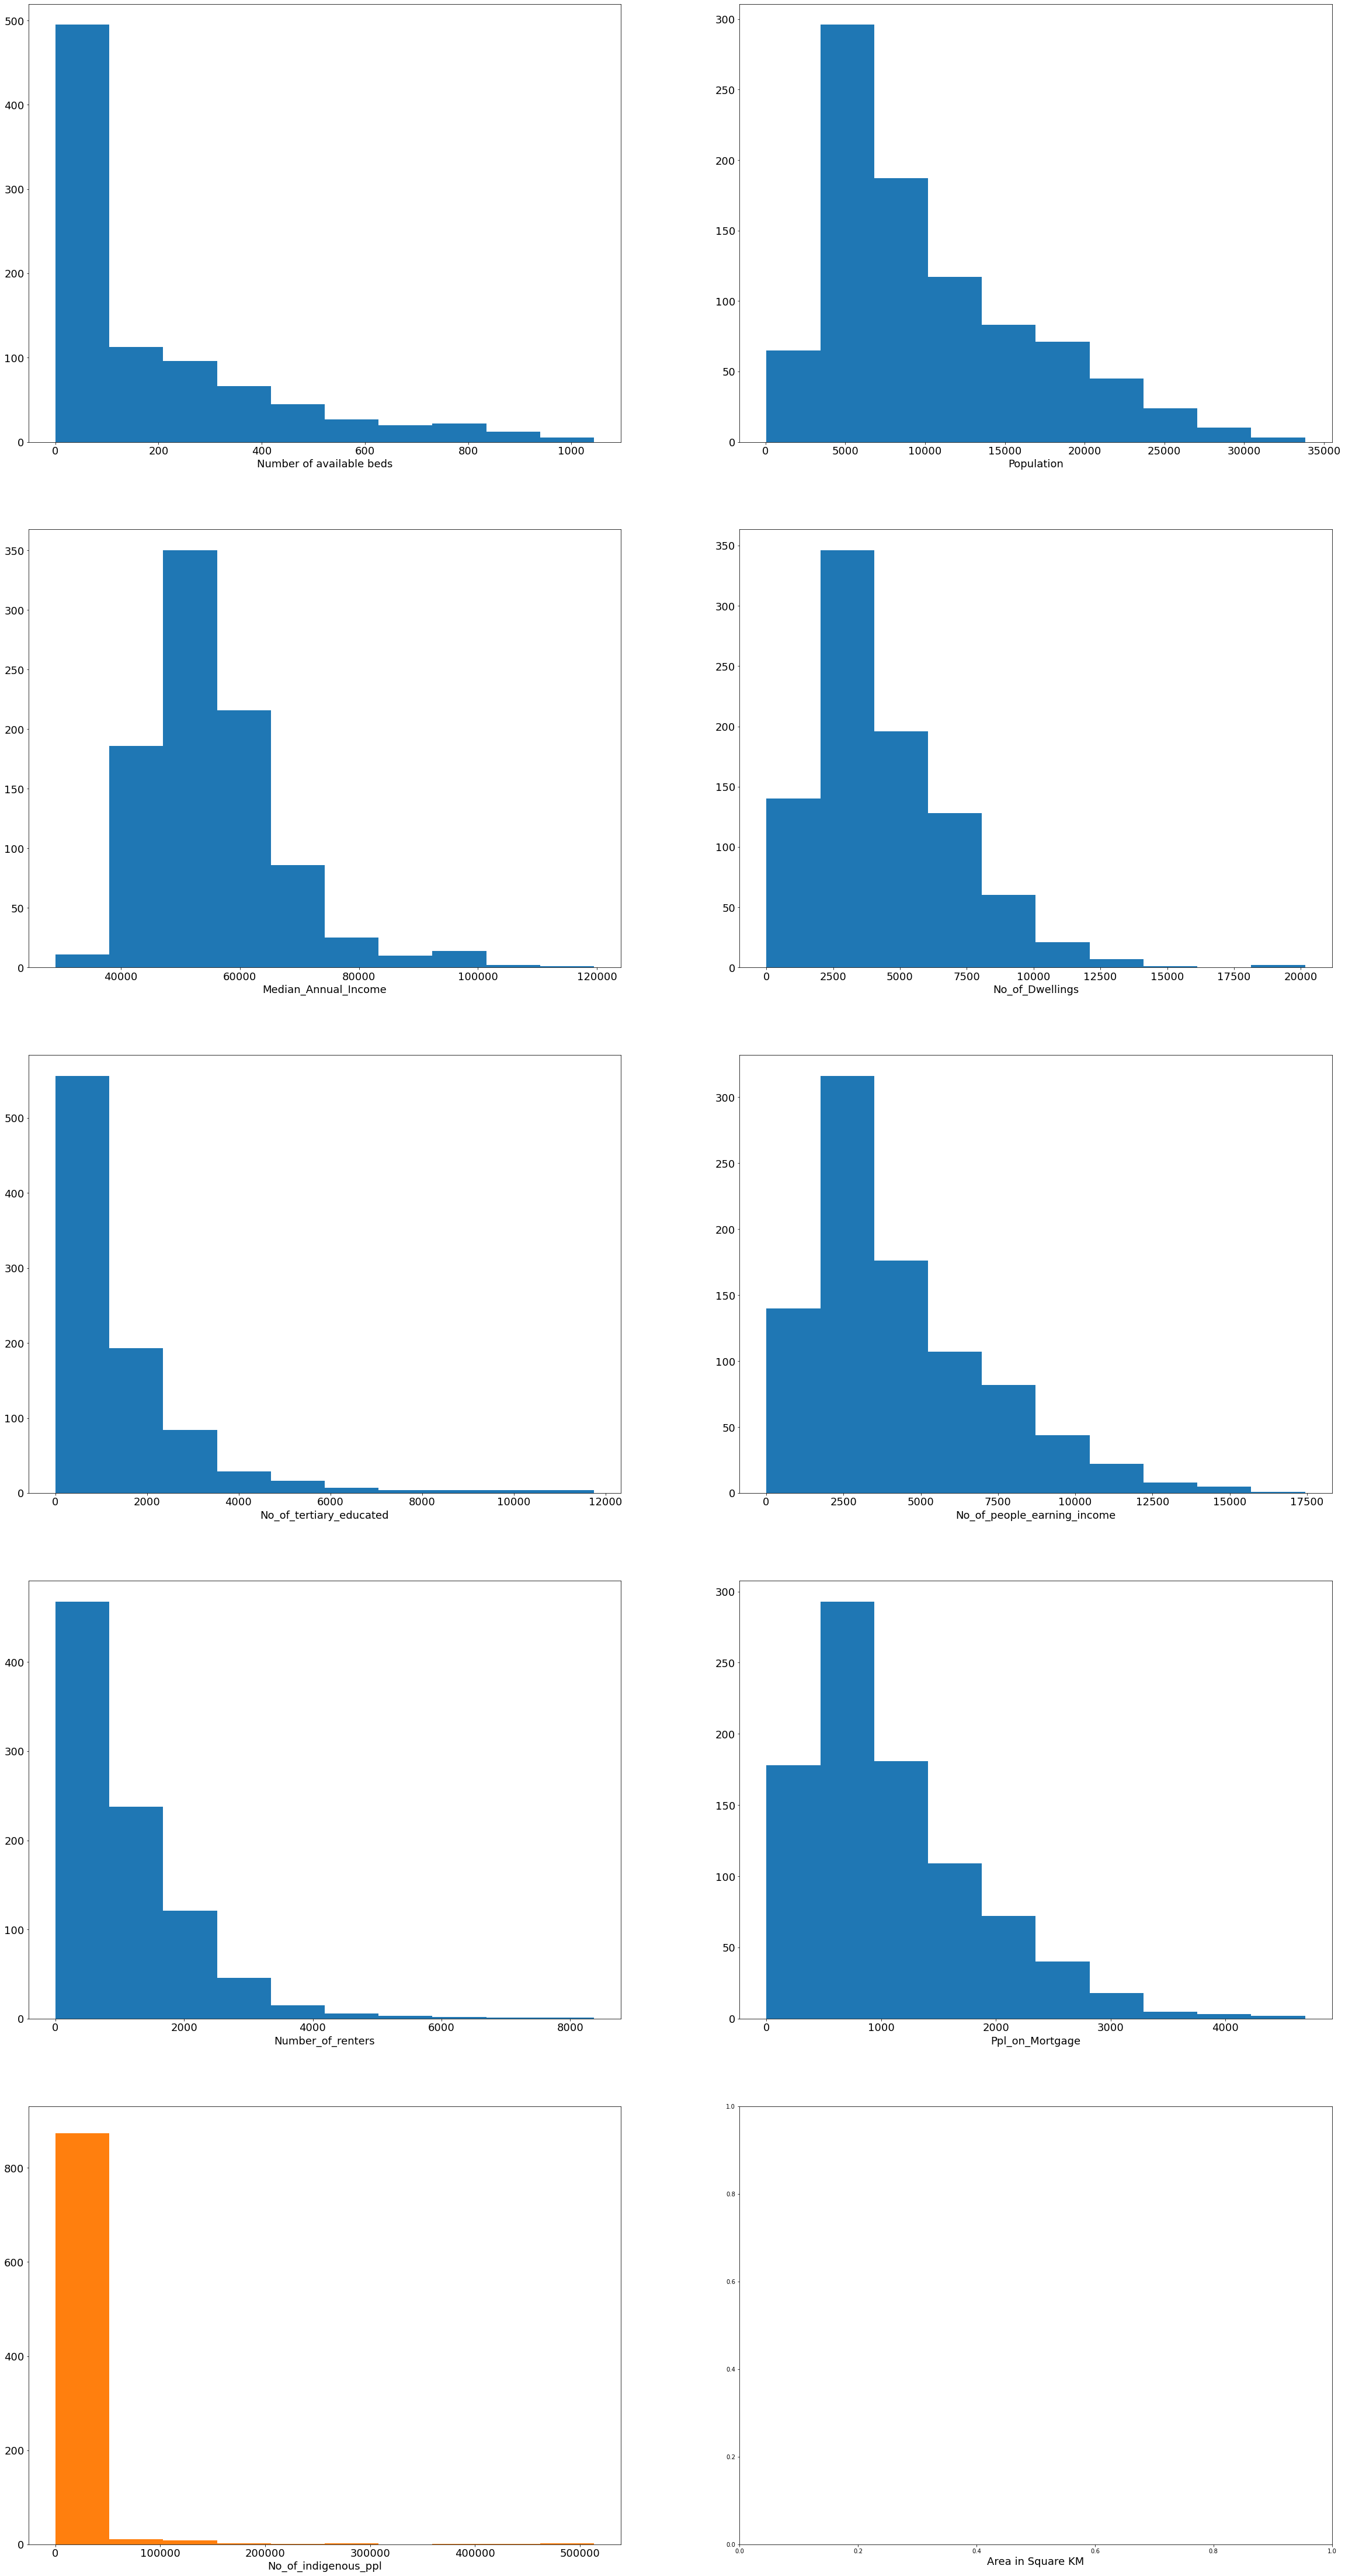

In [24]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(40,80))


# Create a distribution plot for Number of available beds
new_df['Number of available beds'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[0,0])

# Create a distribution plot for population
new_df['Population'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[0,1])

# Create a distribution plot for Median Annual Income
new_df['Median_Annual_Income'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[1,0])

# Create a distribution plot for dwellings
new_df['No_of_Dwellings'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[1,1])

# Create a distribution plot for No of people earning income
new_df['No_of_people_earning_income'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[2,1])

# Create a distribution plot for No of tertiary educated
new_df['No_of_tertiary_educated'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[2,0])

# Create a distribution plot for Monthly Mortgage Repayments
new_df['Ppl_on_Mortgage'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[3,1])

# Create a distribution plot for Number of renters
new_df['Number_of_renters'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[3,0])

# Create a distribution plot for No of indigenous ppl
new_df['No_of_indigenous_ppl'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[4,0])

# Create a distribution plot for the square km of area
new_df['AREA_ALBERS_SQKM'].hist(bins=10, xlabelsize=18, ylabelsize=18, grid=False, ax=ax[4,0])

title_arr = ['Number of available beds',
             'Population',
             'Median_Annual_Income',
             'No_of_Dwellings',
             'No_of_people_earning_income',
            'No_of_tertiary_educated',
             'Ppl_on_Mortgage',
             'Number_of_renters',
             'No_of_indigenous_ppl']

ax[0, 0].set_xlabel("Number of available beds", fontsize=18)
ax[0, 1].set_xlabel("Population", fontsize=18)
ax[1, 0].set_xlabel("Median_Annual_Income", fontsize=18)
ax[1, 1].set_xlabel("No_of_Dwellings", fontsize=18)
ax[2, 1].set_xlabel("No_of_people_earning_income", fontsize=18)
ax[2, 0].set_xlabel("No_of_tertiary_educated", fontsize=18)
ax[3, 1].set_xlabel("Ppl_on_Mortgage", fontsize=18)
ax[3, 0].set_xlabel("Number_of_renters", fontsize=18)
ax[4, 0].set_xlabel("No_of_indigenous_ppl", fontsize=18)
ax[4, 1].set_xlabel("Area in Square KM", fontsize=18)


plt.rcParams['figure.figsize'] = [20, 100]

In [25]:
df_num = new_df.select_dtypes(include=['float64', 'int64'])

df_num.head()

,SA2_MAINCODE,Number of available beds,Population,Median_Annual_Income,No_of_Dwellings,No_of_people_earning_income,No_of_tertiary_educated,Ppl_on_Mortgage,Number_of_renters,No_of_indigenous_ppl,AREA_ALBERS_SQKM
0,801111140,45.7,5158,66401,190,317,109,53,31,0,416.6124
1,604011075,145.0,3206,46033,1628,1184,135,438,556,5,2.1455
2,401011001,812.0,16285,54807,8147,5972,5237,904,3978,7,10.4824
3,401021003,17.0,6914,60508,2670,3558,944,1132,227,0,364.4390
4,312031359,33.0,13375,50559,5701,6653,1359,1061,1788,22,304.0111


Index(['Number of available beds', 'No_of_tertiary_educated',
       'Number_of_renters', 'No_of_people_earning_income',
       'Median_Annual_Income', 'Population', 'Ppl_on_Mortgage',
       'No_of_Dwellings', 'No_of_indigenous_ppl', 'SA2_MAINCODE',
       'AREA_ALBERS_SQKM'],
      dtype='object')


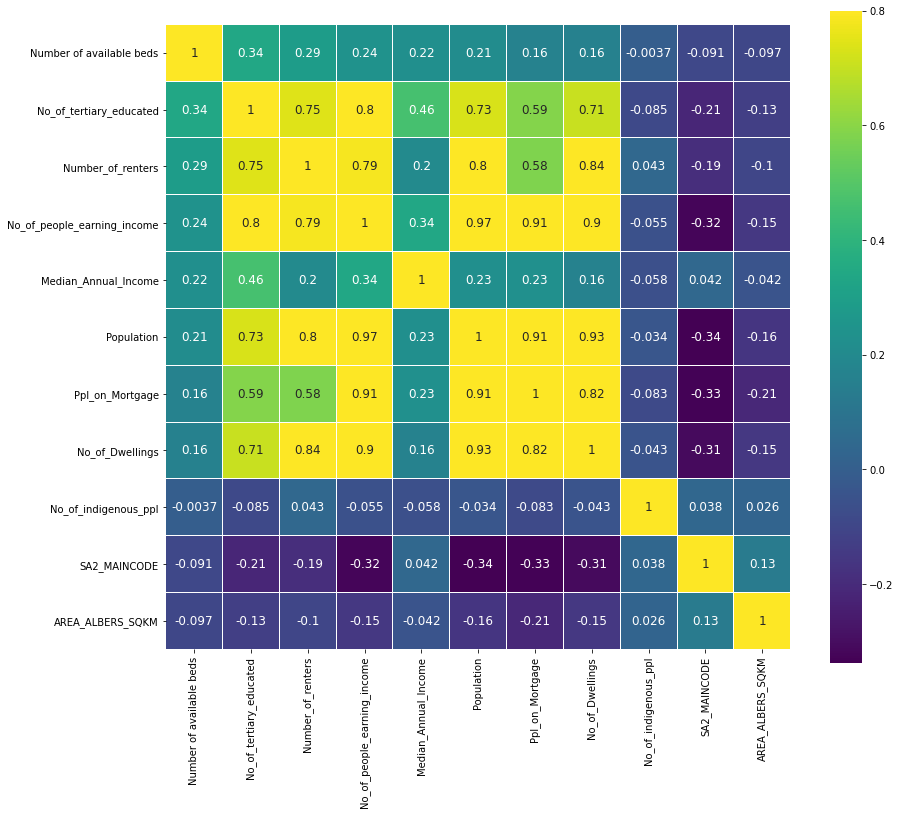

In [26]:
df_num = new_df.select_dtypes(include=['float64', 'int64'])

correlation = df_num.corr()  
k= 11
cols = correlation.nlargest(k,'Number of available beds')['Number of available beds'].index
print(cols)
cm = np.corrcoef(df_num[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

## Export Dataset to be used by ML Jupyter Notebook

In [27]:
new_df.to_excel(r"Output_Data\new_df.xlsx", index=False)